In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import fastf1
import fastf1.plotting as f1plot
from fastf1.core import Laps
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
import os

from fastf1.ergast import Ergast
ergast = Ergast()

year = 2024

In [2]:
schedule = fastf1.get_event_schedule(year)
schedule = schedule[schedule['EventFormat'] == 'conventional']
schedule.reset_index(drop=True)

req         WARNING 	DEFAULT CACHE ENABLED! (3.68 GB) /Users/hatim/Library/Caches/fastf1


RoundNumber               Country           Location  \
0             1               Bahrain             Sakhir   
1             2          Saudi Arabia             Jeddah   
2             3             Australia          Melbourne   
3             4                 Japan             Suzuka   
4             7                 Italy              Imola   
5             8                Monaco             Monaco   
6             9                Canada           Montréal   
7            10                 Spain          Barcelona   
8            12        United Kingdom        Silverstone   
9            13               Hungary           Budapest   
10           14               Belgium  Spa-Francorchamps   
11           15           Netherlands          Zandvoort   
12           16                 Italy              Monza   
13           17            Azerbaijan               Baku   
14           18             Singapore         Marina Bay   
15           20                Mexico        Mexico City   
16           22         United States          Las Vegas   
17           24  United Arab Emirates         Yas Island   

                                    OfficialEventName  EventDate  \
0          FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2024 2024-03-02   
1         FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2024 2024-03-09   
2          FORMULA 1 ROLEX AUSTRALIAN GRAND PRIX 2024 2024-03-24   
3      FORMULA 1 MSC CRUISES JAPANESE GRAND PRIX 2024 2024-04-07   
4   FORMULA 1 MSC CRUISES GRAN PREMIO DEL MADE IN ... 2024-05-19   
5                 FORMULA 1 GRAND PRIX DE MONACO 2024 2024-05-26   
6             FORMULA 1 AWS GRAND PRIX DU CANADA 2024 2024-06-09   
7         FORMULA 1 ARAMCO GRAN PREMIO DE ESPAÑA 2024 2024-06-23   
8     FORMULA 1 QATAR AIRWAYS BRITISH GRAND PRIX 2024 2024-07-07   
9                 FORMULA 1 HUNGARIAN GRAND PRIX 2024 2024-07-21   
10            FORMULA 1 ROLEX BELGIAN GRAND PRIX 2024 2024-07-28   
11           FORMULA 1 HEINEKEN DUTCH GRAND PRIX 2024 2024-08-25   
12        FORMULA 1 PIRELLI GRAN PREMIO D’ITALIA 2024 2024-09-01   
13  FORMULA 1 QATAR AIRWAYS AZERBAIJAN GRAND PRIX ... 2024-09-15   
14  FORMULA 1 SINGAPORE AIRLINES SINGAPORE GRAND P... 2024-09-22   
15  FORMULA 1 GRAN PREMIO DE LA CIUDAD DE MÉXICO 2024 2024-10-27   
16  FORMULA 1 HEINEKEN SILVER LAS VEGAS GRAND PRIX... 2024-11-23   
17  FORMULA 1 ETIHAD AIRWAYS ABU DHABI GRAND PRIX ... 2024-12-08   

                    EventName   EventFormat    Session1  \
0          Bahrain Grand Prix  conventional  Practice 1   
1    Saudi Arabian Grand Prix  conventional  Practice 1   
2       Australian Grand Prix  conventional  Practice 1   
3         Japanese Grand Prix  conventional  Practice 1   
4   Emilia Romagna Grand Prix  conventional  Practice 1   
5           Monaco Grand Prix  conventional  Practice 1   
6         Canadian Grand Prix  conventional  Practice 1   
7          Spanish Grand Prix  conventional  Practice 1   
8          British Grand Prix  conventional  Practice 1   
9        Hungarian Grand Prix  conventional  Practice 1   
10         Belgian Grand Prix  conventional  Practice 1   
11           Dutch Grand Prix  conventional  Practice 1   
12         Italian Grand Prix  conventional  Practice 1   
13      Azerbaijan Grand Prix  conventional  Practice 1   
14       Singapore Grand Prix  conventional  Practice 1   
15     Mexico City Grand Prix  conventional  Practice 1   
16       Las Vegas Grand Prix  conventional  Practice 1   
17       Abu Dhabi Grand Prix  conventional  Practice 1   

                 Session1Date     Session1DateUtc  ...    Session3  \
0   2024-02-29 14:30:00+03:00 2024-02-29 11:30:00  ...  Practice 3   
1   2024-03-07 16:30:00+03:00 2024-03-07 13:30:00  ...  Practice 3   
2   2024-03-22 12:30:00+11:00 2024-03-22 01:30:00  ...  Practice 3   
3   2024-04-05 11:30:00+09:00 2024-04-05 02:30:00  ...  Practice 3   
4   2024-05-17 13:30:00+02:00 2024-05-17 11:30:00  ...  Practice 3   
5   2024-05-24 13:30:00+02:0

In [3]:
def season_history(year):
    if os.path.exists(f'{year}/quali_history.csv'):
        return pd.read_csv(f'{year}/quali_history.csv', index_col=0)
    # Get the event schedule for the season
    schedule = fastf1.get_event_schedule(year)

    # Initialize an empty dictionary to store qualifying results
    qualifying_data = {}

    # Loop through each race in the schedule
    for round_number in schedule['RoundNumber'][1:-1]:
        try:
            # Load qualifying session data for the race
            event = schedule[schedule['RoundNumber'] == round_number]
            grand_prix = event['EventName'].iloc[0]
            session = fastf1.get_session(year, grand_prix, 'Q')
            session.load()

            # Extract qualifying results
            results = session.results[['Abbreviation', 'Position']]

            # Add the round number as a column to the results
            results.rename(columns={'Position': f'Round {round_number}'}, inplace=True)
            results.set_index('Abbreviation', inplace=True)

            # Merge the results into the qualifying_data dictionary
            qualifying_data[round_number] = results[f'Round {round_number}']

        except Exception as e:
            print(f"Could not process Round {round_number}: {e}")

    # Combine all rounds into a single DataFrame
    qualifying_df = pd.concat(qualifying_data, axis=1)

    # Sort the DataFrame by driver abbreviation
    qualifying_df = qualifying_df.sort_index()

    # Save the DataFrame to a CSV file
    qualifying_df.to_csv(f'{year}/quali_history.csv')
    return qualifying_df

qualifying_history = season_history(year)
qualifying_history

1     2     3     4     5     6     7     8     9    10  ...  \
Abbreviation                                                              ...   
ALB           13.0  12.0  12.0  14.0  14.0  14.0  14.0   9.0  10.0  19.0  ...   
ALO            6.0   4.0  10.0   5.0   3.0  15.0  19.0  16.0   6.0  11.0  ...   
BEA            NaN  11.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
BOT           16.0  16.0  13.0  13.0  10.0  16.0  16.0  19.0  17.0  12.0  ...   
COL            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
GAS           20.0  18.0  17.0  17.0  15.0  12.0  15.0  10.0  15.0   7.0  ...   
HAM            9.0   8.0  11.0   7.0  18.0   8.0   8.0   7.0   7.0   3.0  ...   
HUL           10.0  15.0  16.0  12.0   9.0   9.0  10.0  12.0  19.0  13.0  ...   
LAW            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
LEC            2.0   2.0   5.0   8.0   6.0   2.0   4.0   1.0  11.0   5.0  ...   
MAG           15.0  13.0  14.0  18.0  17.0  19.0  18.0  15.0  14.0  16.0  ...   
NOR            7.0   6.0   4.0   3.0   4.0   5.0   3.0   4.0   3.0   1.0  ...   
OCO           19.0  17.0  15.0  15.0  13.0  13.0  12.0  11.0  18.0   9.0  ...   
PER            5.0   3.0   3.0   2.0   2.0   4.0  11.0  18.0  16.0   8.0  ...   
PIA            8.0   5.0   6.0   6.0   5.0   6.0   2.0   2.0   4.0  10.0  ...   
RIC           14.0  14.0  18.0  11.0  12.0  18.0   9.0  13.0   5.0  18.0  ...   
RUS            3.0   7.0   7.0   9.0   8.0   7.0   6.0   5.0   1.0   4.0  ...   
SAI            4.0   NaN   2.0   4.0   7.0   3.0   5.0   3.0  12.0   6.0  ...   
SAR           18.0  19.0   NaN  19.0  20.0  17.0  20.0  17.0  13.0  20.0  ...   
STR           12.0  10.0   9.0  16.0  11.0  11.0  13.0  14.0   9.0  14.0  ...   
TSU           11.0   9.0   8.0  10.0  19.0  10.0   7.0   8.0   8.0  17.0  ...   
VER            1.0   1.0   1.0   1.0   1.0   1.0   1.0   6.0   2.0   2.0  ...   
ZHO           17.0  20.0  19.0  20.0  16.0  20.0  17.0  20.0  20.0  15.0  ...   

                14    15    16    17    18    19    20    21    22    23  
Abbreviation                                                              
ALB           11.0  19.0   9.0  10.0  11.0  16.0   9.0   7.0  18.0  16.0  
ALO            9.0   7.0  11.0   8.0   7.0   8.0  13.0   9.0  17.0   8.0  
BEA            NaN   NaN   NaN  11.0   NaN   NaN   NaN  17.0   NaN   NaN  
BOT           14.0  17.0  19.0  17.0  19.0  18.0  15.0  11.0  19.0  13.0  
COL            NaN   NaN  18.0   9.0  12.0  17.0  16.0  18.0  14.0  19.0  
GAS           12.0   9.0  14.0  20.0  18.0   7.0   8.0  15.0   3.0  11.0  
HAM            4.0  11.0   6.0   7.0   3.0  19.0   6.0  16.0  10.0   6.0  
HUL           16.0  13.0  10.0  13.0   6.0  12.0  10.0  19.0   9.0  18.0  
LAW            NaN   NaN   NaN   NaN   NaN  15.0  12.0   5.0  15.0  17.0  
LEC            2.0   6.0   4.0   1.0   9.0   4.0   4.0   6.0   4.0   5.0  
MAG           17.0  14.0  13.0   NaN  14.0   9.0   7.0   NaN  12.0  10.0  
NOR            5.0   1.0   1.0  16.0   1.0   1.0   3.0   1.0   6.0   3.0  
OCO           10.0  16.0  15.0  19.0  15.0  13.0  19.0   4.0  11.0  20.0  
PER            3.0   5.0   8.0   4.0  13.0  10.0  18.0  13.0  16.0   9.0  
PIA            6.0   3.0   2.0   2.0   5.0   5.0  17.0   8.0   8.0   4.0  
RIC           13.0  15.0  12.0  15.0  16.0   NaN   NaN   NaN   NaN   NaN  
RUS            7.0   4.0   3.0   5.0   4.0   6.0   5.0   2.0   1.0   2.0  
SAI            8.0  10.0   5.0   3.0  10.0   3.0   1.0  14.0   2.0   7.0  
SAR           19.0  20.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
STR           15.0   8.0  17.0  14.0  17.0  14.0  14.0  10.0  20.0  15.0  
TSU           18.0  12.0  16.0  12.0   8.0  11.0  11.0   3.0   7.0  14.0  
VER            1.0   2.0   7.0   6.0   2.0   2.0   2.0  12.0   5.0   1.0  
ZHO           20.0  18.0  20.0  18.0  20.0  20.0  20.0  20.0  13.0  12.0  

[23 rows x 23 columns]

# Race Class Definition and Data Retrieval

In [4]:
class Race:
    def __init__(self, event_name, year=year) -> None:
        self.event_name = event_name
        self.year = year
        self.directory = str(self.year) + '/'+event_name

        # Check if data files exist, if not, load and save them
        if self.data_files_exist():
            self.load_data_from_files()
        else:
            self.fp1 = self.get_fp(1)
            self.fp2 = self.get_fp(2)
            self.fp3 = self.get_fp(3)
            self.quali = self.get_qualifying()
            # self.driver_stats = self.get_driver_stats()
            self.save_dataframes()

        self.drivers = self.quali['Abbreviation'].unique()
        self.teams = self.quali['TeamName'].unique()

    def data_files_exist(self):
        return (os.path.exists(f'{self.directory}/fp1.csv') and
                os.path.exists(f'{self.directory}/fp2.csv') and
                os.path.exists(f'{self.directory}/fp3.csv') and
                os.path.exists(f'{self.directory}/quali.csv') )
                # and
                # os.path.exists(f'{self.directory}/driver_stats.csv'))

    def load_data_from_files(self):
        self.fp1 = pd.read_csv(f'{self.directory}/fp1.csv')
        self.fp2 = pd.read_csv(f'{self.directory}/fp2.csv')
        self.fp3 = pd.read_csv(f'{self.directory}/fp3.csv')
        self.quali = pd.read_csv(f'{self.directory}/quali.csv')
        # self.driver_stats = pd.read_csv(f'{self.directory}/driver_stats.csv')

    def save_dataframes(self):
        os.makedirs(self.directory, exist_ok=True)
        self.fp1.to_csv(f'{self.directory}/fp1.csv', index=False)
        self.fp2.to_csv(f'{self.directory}/fp2.csv', index=False)
        self.fp3.to_csv(f'{self.directory}/fp3.csv', index=False)
        self.quali.to_csv(f'{self.directory}/quali.csv', index=False)
        # self.driver_stats.to_csv(f'{self.directory}/driver_stats.csv', index=False)

    def get_fp(self, session_num):
        session = fastf1.get_session(self.year, self.event_name, f'FP{session_num}')
        session.load()
        return session.laps.pick_quicklaps()

    def get_qualifying(self):
        session = fastf1.get_session(self.year, self.event_name, 'Q')
        session.load()
        quali = session.results[['Abbreviation', 'Position', 'TeamName','TeamColor', 'Q1', 'Q2', 'Q3']]
        quali['Q1'] = pd.to_timedelta(quali['Q1']).dt.total_seconds()
        quali['Q2'] = pd.to_timedelta(quali['Q2']).dt.total_seconds()
        quali['Q3'] = pd.to_timedelta(quali['Q3']).dt.total_seconds()
        # only take time from the last session the driver participated in
        quali['Time'] = quali.apply(lambda row: row['Q3'] if pd.notna(row['Q3']) else (row['Q2'] if pd.notna(row['Q2']) else row['Q1']), axis=1)
        quali = quali.drop(columns=['Q1', 'Q2', 'Q3'])
        return quali.reset_index(drop=True)


    def filter_fp(self, session, compounds=None):
        # Get the session data
        if session == 1:
            sesh = self.fp1
        elif session == 2:
            sesh = self.fp2
        elif session == 3:
            sesh = self.fp3

        # Filter by compounds if provided
        if compounds is not None:
            sesh = sesh[sesh['Compound'].isin(compounds)]

        # Remove outlaps and inlaps
        sesh = sesh[sesh['PitOutTime'].isna() & sesh['PitInTime'].isna()]

        return sesh
    
    def combine_fp(self, compounds = None):
        fp1 = self.filter_fp(1, compounds)
        fp2 = self.filter_fp(2, compounds)
        fp3 = self.filter_fp(3, compounds)

        # combine all 3 fp sessions
        combined = pd.concat([fp1, fp2, fp3])
        combined['LapTime'] = pd.to_timedelta(combined['LapTime']).dt.total_seconds()
        return combined
    
    def plot_fp(self, type='box', compounds=None):
        df = self.combine_fp(compounds=compounds)

        if type == 'scatter':
            fig = px.scatter(df, x='LapNumber', y='LapTime', color='Team', title=f'{self.event_name} FP1, FP2, FP3 Soft Tire Laps')

        elif type == 'box':
            sorted_drivers = self.quali.sort_values('Position')['Abbreviation'].to_list()
            fig = px.box(df, y='LapTime', x='Driver', title=f'{self.event_name} FP1, FP2, FP3 {compounds} Tire Laps', category_orders={'Driver' : sorted_drivers})

            # Calculate cumulants
            mean_lap_times = df.groupby('Driver')['LapTime'].mean().reindex(sorted_drivers)
            std_lap_times = df.groupby('Driver')['LapTime'].std().reindex(sorted_drivers)
            skew_lap_times = df.groupby('Driver')['LapTime'].skew().reindex(sorted_drivers)
            kurt_lap_times = df.groupby('Driver')['LapTime'].apply(lambda x: x.kurt()).reindex(sorted_drivers)
            count_lap_times = df.groupby('Driver')['LapTime'].count().reindex(sorted_drivers)

            min = df['LapTime'].min()

            # Add mean lap times as a line plot
            fig.add_trace(go.Scatter(
                x=mean_lap_times.index,
                y=mean_lap_times.values,
                mode='lines+markers',
                name='Mean',
                line=dict(color='red')
            ))
            fig.add_trace(go.Scatter(
                x=std_lap_times.index,
                y=std_lap_times.values + min,
                mode='lines+markers',
                name='min + Std',
                line=dict(color='green')
            ))
            fig.add_trace(go.Scatter(
                x=skew_lap_times.index,
                y=-skew_lap_times.values + min,
                mode='lines+markers',
                name='min+skew',
                line=dict(color='yellow')
            ))

            fig.add_trace(go.Scatter(
                x=kurt_lap_times.index,
                y=kurt_lap_times.values + min,
                mode='lines+markers',
                name='min+kurt',
                line=dict(color='purple')
            ))

            fig.add_trace(go.Scatter(
                x=count_lap_times.index,
                y=count_lap_times.values,
                mode='lines+markers',
                name='count',
                line=dict(color='orange'),
                yaxis='y2'
            ))

            fig.update_layout(
            yaxis2=dict(
                title='Count',
                overlaying='y',
                side='right'
            ))

        fig.show()

    def preprocess(self, compounds=['SOFT']):
        """
        Preprocesses the combined free practice data to compute statistical features for each driver.
        Returns a dataset with one row per driver containing features and the target variable.
        """
        # Combine all FP sessions, filtered by compounds if specified
        df = self.combine_fp(compounds=compounds)
        
        # Ensure 'LapTime' is in seconds (should already be converted in 'combine_fp')
        
        # Group by 'Driver' and compute statistical features
        from scipy.stats import kurtosis
        features = df.groupby('Driver').agg({
            'LapTime': ['mean', 'std', 'min', 'max', 'median', 'skew', lambda x: kurtosis(x, bias=False) ,'count'],
            'SpeedST': ['mean', 'std']
        })
        
        # Flatten the MultiIndex columns
        features.columns = ['_'.join(col).strip() for col in features.columns.values]
        features.rename(columns={'LapTime_<lambda_0>': 'LapTime_kurtosis'}, inplace=True)
        
        # Reset index to make 'Driver' a column
        features = features.reset_index()
        
        # Prepare qualifying results with the target variable
        # Rename 'Abbreviation' to 'Driver' to match with 'features' DataFrame
        quali_results = self.quali[['Abbreviation', 'Position']].rename(columns={'Abbreviation': 'Driver'})
        
        # Merge features and qualifying results on 'Driver'
        dataset = pd.merge(features, quali_results, on='Driver')

        # merge driver stats to it as well
        dataset = pd.merge(dataset, self.get_driver_stats(), on='Driver', how='left')
        
        # Return the final dataset
        return dataset

    def get_driver_stats(self):

        # create driver-team mapping
        driver_team = self.quali[['Abbreviation', 'TeamName']]
        driver_team.columns = ['Driver', 'Team']

        # get round number from schedule
        round_num = schedule[schedule['EventName'] == self.event_name]['RoundNumber'].values[0] - 1 #subtract one because we want data before the weekend
        # if its round 1 everything is zero
        if round_num == 0:
            driver_team['driver_points'] = np.zeros(len(driver_team))
            driver_team['team_points'] = np.zeros(len(driver_team))
        else:

            driver_standings = ergast.get_driver_standings(season=year, round=round_num, result_type='pandas').content[0][['driverCode', 'points']]
            driver_standings.columns = ['Driver', 'Driver_points']
                
            team_standings = ergast.get_constructor_standings(season=year, round=round_num, result_type='pandas').content[0][['constructorName', 'points']]
            team_standings.columns = ['Team', 'Team_points']

                
            team_corrections = {'Red Bull': 'Red Bull Racing', 'RB F1 Team':'RB', 'Alpine F1 Team': 'Alpine', 'Sauber' : 'Kick Sauber'}
            team_standings['Team'] = team_standings['Team'].replace(team_corrections)
                
            driver_team = pd.merge(driver_team, driver_standings, on='Driver', how='left')
            driver_team = pd.merge(driver_team, team_standings, on='Team', how='left')

        # drop the team column
        driver_team.drop(columns=['Team'], inplace=True)
        driver_team.fillna(0, inplace=True)

        global qualifying_history

        # get the average qualifying position of the driver upto round_num
        # again, the zero round case is handled seperately - all drivers have 20 average position (it'll get standardized to 0 but intuitively we dont have expectations at this point in terms of this feature)
        if round_num == 0:
            driver_team['quali_avg'] = np.ones(len(driver_team)) * 20
        else:
            ave = qualifying_history.iloc[:, :round_num].mean(axis=1)
            ave = pd.DataFrame({'Driver' : qualifying_history.index, 'quali_avg' : ave})

            driver_team = driver_team.merge(ave, on='Driver', how='left')

        # if value is missing, fill it with 20 - all rookies who shouldnt have expectations
        driver_team['quali_avg'].fillna(20, inplace=True)
        
        return driver_team
    

# round 1 and 15 are missing driver points these were rookie standins.
race_name =[]
race_data = []
for event in schedule['EventName'].to_list()[:-1]:
    race_name.append(event)
    race_data.append(Race(event).preprocess())

race_data[0]



/var/folders/26/gpxb1mwx5zd590_4yvmsyt0m0000gn/T/ipykernel_81886/4291157966.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driver_team['driver_points'] = np.zeros(len(driver_team))
/var/folders/26/gpxb1mwx5zd590_4yvmsyt0m0000gn/T/ipykernel_81886/4291157966.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  driver_team['team_points'] = np.zeros(len(driver_team))
/var/folders/26/gpxb1mwx5zd590_4yvmsyt0m0000gn/T/ipykernel_81886/4291157966.py:223: SettingWithCopyWarning: 
A value is trying to be set o

Driver  LapTime_mean  LapTime_std  LapTime_min  LapTime_max  \
0     ALB     92.434429     1.388412       91.333       95.477   
1     ALO     91.974625     1.204474       90.660       94.303   
2     BOT     92.958500     0.750166       92.001       93.856   
3     GAS     92.665375     0.526089       91.951       93.519   
4     HAM     92.194000     2.118703       90.374       96.669   
5     HUL     92.071333     0.879622       90.884       93.038   
6     LEC     92.695300     2.158637       91.094       96.636   
7     MAG     93.776417     1.936835       91.671       96.052   
8     NOR     95.320364     2.874593       91.118       98.718   
9     OCO     92.684429     0.505566       92.027       93.277   
10    PER     93.135625     2.481635       91.115       96.411   
11    PIA     94.126333     2.293226       90.784       96.527   
12    RIC     95.544727     3.355497       91.449       99.004   
13    RUS     92.486833     2.185808       90.580       96.678   
14    SAI     92.085444     0.906801       90.769       93.111   
15    SAR     92.858625     1.518618       91.715       96.368   
16    STR     91.963000     0.673995       90.891       93.173   
17    TSU     94.825231     3.107224       91.631       98.780   
18    VER     94.097091     2.854451       90.851       96.645   
19    ZHO     93.067125     1.168220       92.000       95.233   

    LapTime_median  LapTime_skew  LapTime_kurtosis  LapTime_count  \
0          91.9650      2.283340          5.596502              7   
1          91.7580      0.991420          0.750958              8   
2          93.2220     -0.264013         -2.034985             10   
3          92.5135      0.410634         -0.843482              8   
4          91.4520      1.958441          4.260058              7   
5          92.1065     -0.189194         -1.514763              6   
6          91.8015      1.467154          0.726862             10   
7          92.9550      0.246370         -2.137849             12   
8          97.0000     -0.209583         -2.021312             11   
9          93.0030     -0.346188         -2.139018              7   
10         91.5125      0.642677         -2.185526              8   
11         93.3220     -0.258954         -1.663681              9   
12         98.2450     -0.256639         -2.288350             11   
13         91.8210      1.837290          3.716779              6   
14         92.2020     -0.424549         -1.457759              9   
15         92.3725      2.148693          5.131096              8   
16         91.7350      0.274932          0.205051              9   
17         93.1830      0.440816         -1.994215             13   
18         96.4990     -0.216979         -2.430642             11   
19         92.8785      0.859200         -0.048509              8   

    SpeedST_mean  SpeedST_std  Position  driver_points  team_points  quali_avg  
0     314.571429     1.397276      13.0            0.0          0.0       20.0  
1     309.875000     9.140764       6.0            0.0          0.0       20.0  
2     308.000000     2.788867      16.0            0.0          0.0       20.0  
3     311.750000     1.832251      20.0            0.0          0.0       20.0  
4     308.571429     8.182443       9.0            0.0          0.0       20.0  
5     315.500000     2.428992      10.0            0.0          0.0       20.0  
6     309.222222     8.074308       2.0            0.0          0.0       20.0  
7     302.090909    14.720425      15.0            0.0          0.0       20.0  
8     297.818182     9.097452       7.0            0.0          0.0       20.0  
9     310.000000     1.914854      19.0            0.0          0.0       20.0  
10    305.375000    13.146836       5.0            0.0          0.0       20.0  
11    301.333333    10.368221       8.0            0.0          0.0       20.0  
12    301.363636    11.245201      14.0            0.0          0.0       20.0  
13    307.000000     7.694154   

In [5]:
def plot_fp(race_names, compounds=['SOFT']):
    for name in race_names:
        Race(name).plot_fp(compounds=compounds)

def plot_correllations(race_name, race_data):
    for name, data in zip(race_name, race_data):
        corr = data.corr(numeric_only=True)
        plt.figure(figsize=(12, 8))
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title(f'{name} Correlation Matrix')
        plt.show()


from sklearn.preprocessing import MinMaxScaler, StandardScaler

def split_xy(drivers, y, X, race_ids, test_id):
    
    train_filter = race_ids != test_id
    X_train = X[train_filter]
    y_train = y[train_filter]

    test_filter = race_ids == test_id
    X_test = X[test_filter]
    y_test = y[test_filter]

    drivers_test = drivers[race_ids == test_id]

    return X_train, y_train, X_test, y_test, drivers_test

def predict_rankings(model, X_test, y_test, drivers_test):
    y_pred = model.predict(X_test)


    # transform y_test back to original scale
    y_true = y_test.max() - y_test + 1
    predicted_rankings = (-y_pred).argsort().argsort() + 1


    results_df = pd.DataFrame({'PredictedRank': predicted_rankings, 'ActualPosition': y_true, 'driver': drivers_test})
    results_df = results_df.sort_values('ActualPosition').set_index('driver')
    results_df['Distance'] =np.abs(results_df['PredictedRank'] - results_df['ActualPosition']) 
    return results_df


def evaluate_model(results_df, race_name):
    # Evaluate the model
    from scipy.stats import spearmanr
    from sklearn.metrics import mean_absolute_error

    mean_ab_error = mean_absolute_error(results_df['ActualPosition'], results_df['PredictedRank'])
    # mse = np.sqrt(np.mean((results_df['ActualPosition'] - results_df['PredictedRank'])**2))
    spearman_corr, _ = spearmanr(results_df['PredictedRank'], results_df['ActualPosition'])
    # kendall_corr, _ = kendalltau(results_df['PredictedRank'], results_df['ActualPosition'])

    return {'Race' : race_name,
            'mean_ab_error': mean_ab_error, 
            'spearman_corr': spearman_corr
            }


    



# plot data for model
def display_results(summary):
    # bar chart where x is the event name, and the y values are all the scores
    summary_df = pd.DataFrame(summary).set_index('Race')
    print('Means:')
    print(summary_df.mean())
    results = schedule[['RoundNumber', 'EventName']].merge(summary_df, left_on='EventName', right_index=True).set_index('EventName')
    results.sort_values('RoundNumber', inplace=True)
    results.drop(columns='RoundNumber', inplace=True)
    fig = go.Figure()
    fig.add_trace(go.Bar(x=summary_df.index, y=summary_df['mean_ab_error'], name='MARE'))
    fig.add_trace(go.Bar(x=summary_df.index, y=summary_df['spearman_corr'], name='Spearman'))

    error = summary_df[['mean_ab_error', 'spearman_corr']]
    error['cum_mae'] = summary_df['mean_ab_error'].cumsum() / range(1, len(summary_df) + 1)
    error['cum_spearman'] = summary_df['spearman_corr'].cumsum() / range(1, len(summary_df) + 1)

    fig.add_trace(go.Scatter(x=summary_df.index, y=error['cum_mae'], mode='lines+markers', name='Cumulative MARE', line=dict(color='blue')))
    fig.add_trace(go.Scatter(x=summary_df.index, y=error['cum_spearman'], mode='lines+markers', name='Cumulative Spearman', line=dict(color='red')))
    
    fig.update_layout(barmode='group', xaxis_title='Event', yaxis_title='Score')
    fig.update_layout(title='Model Evaluation Scores by Event')
    fig.show()
    return summary_df




# EDA

In [6]:
plot_fp(race_name)

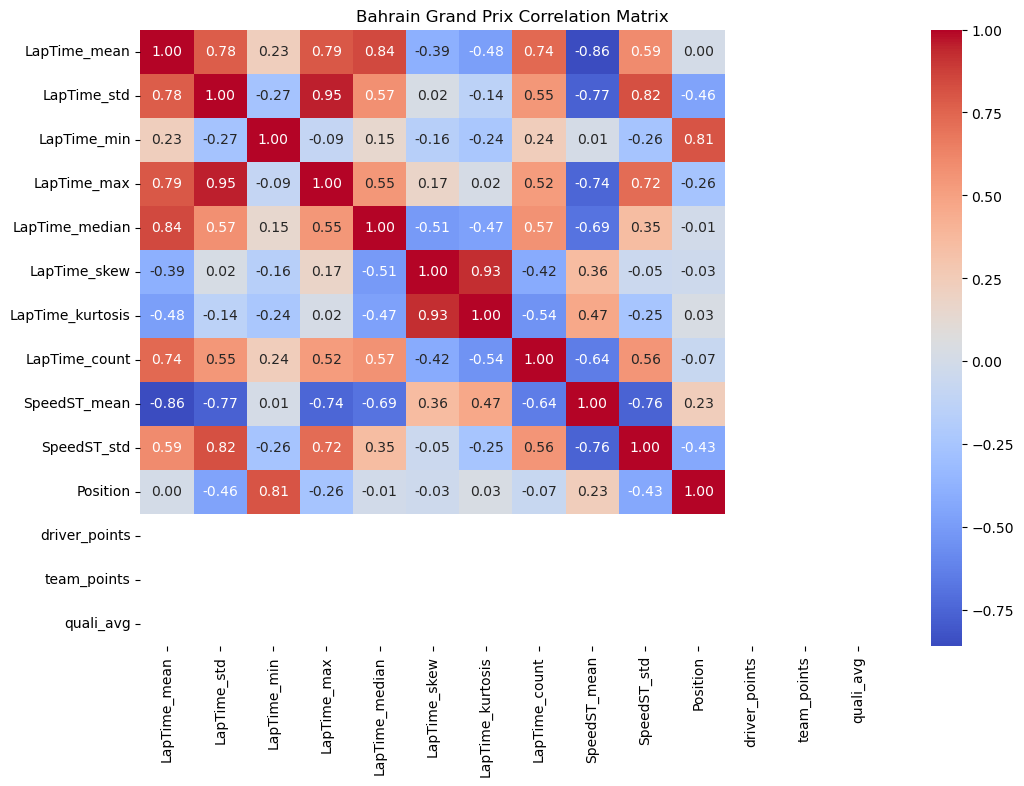

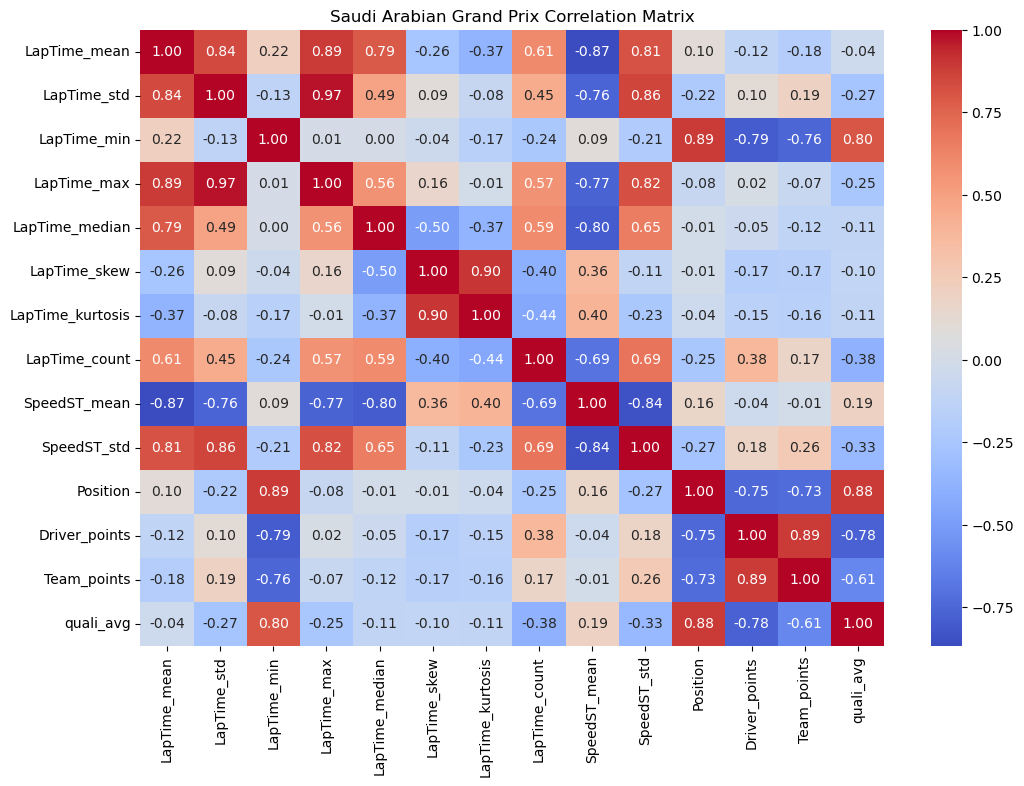

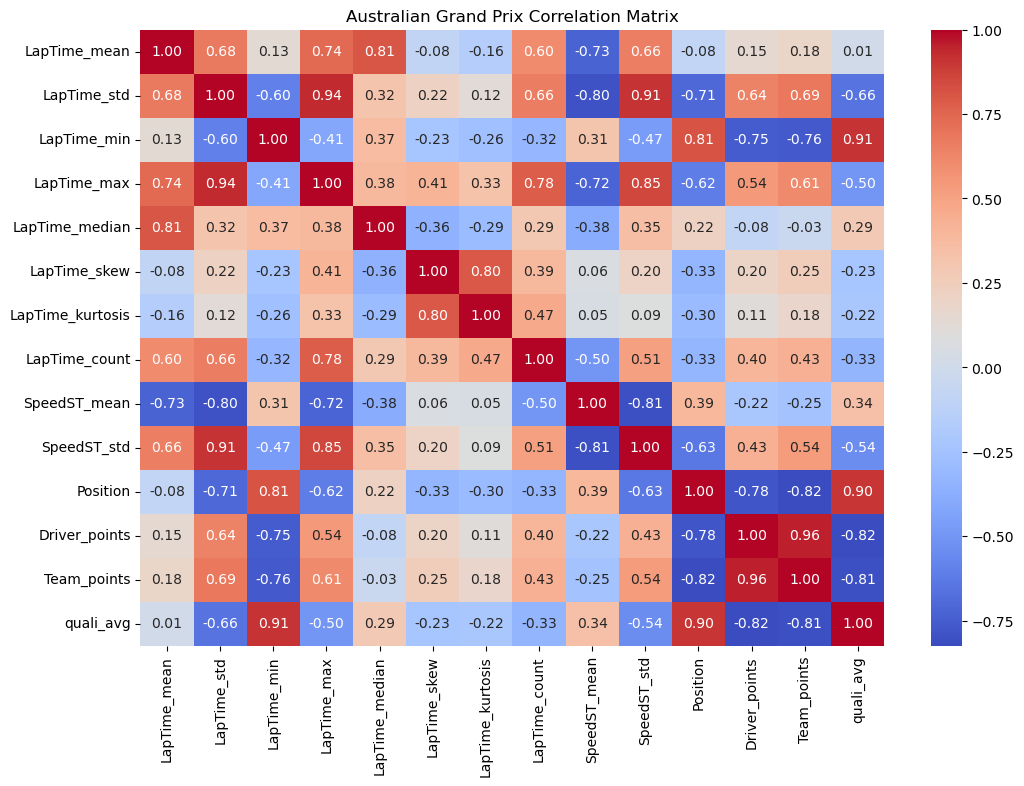

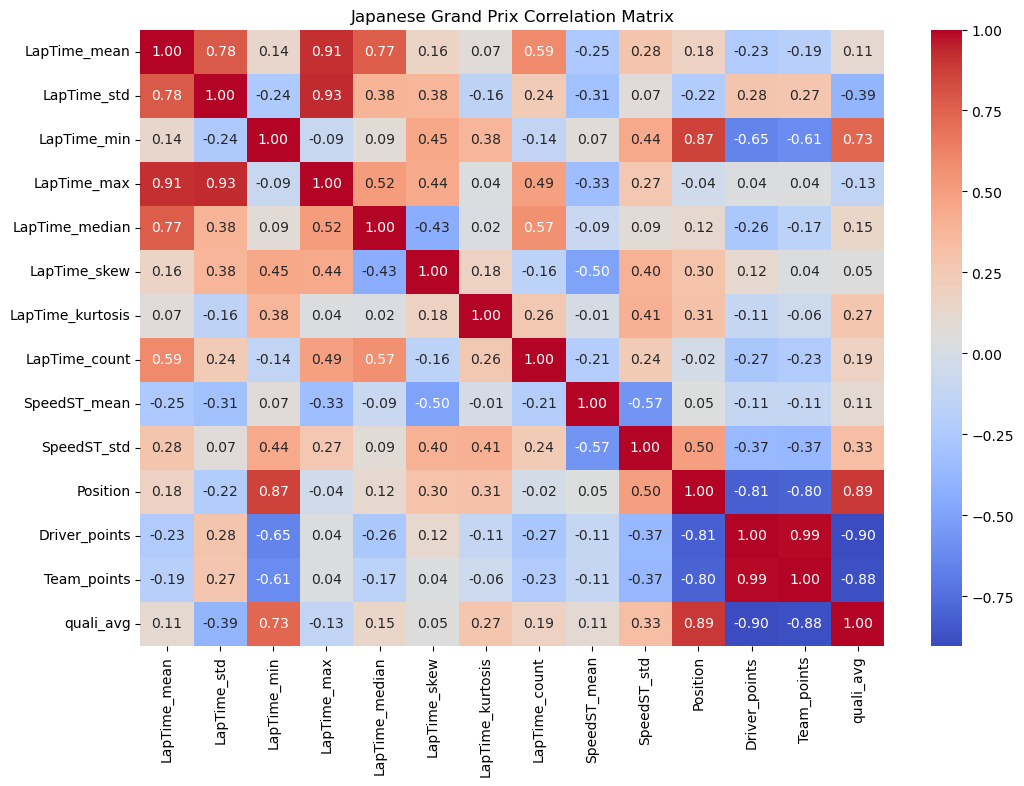

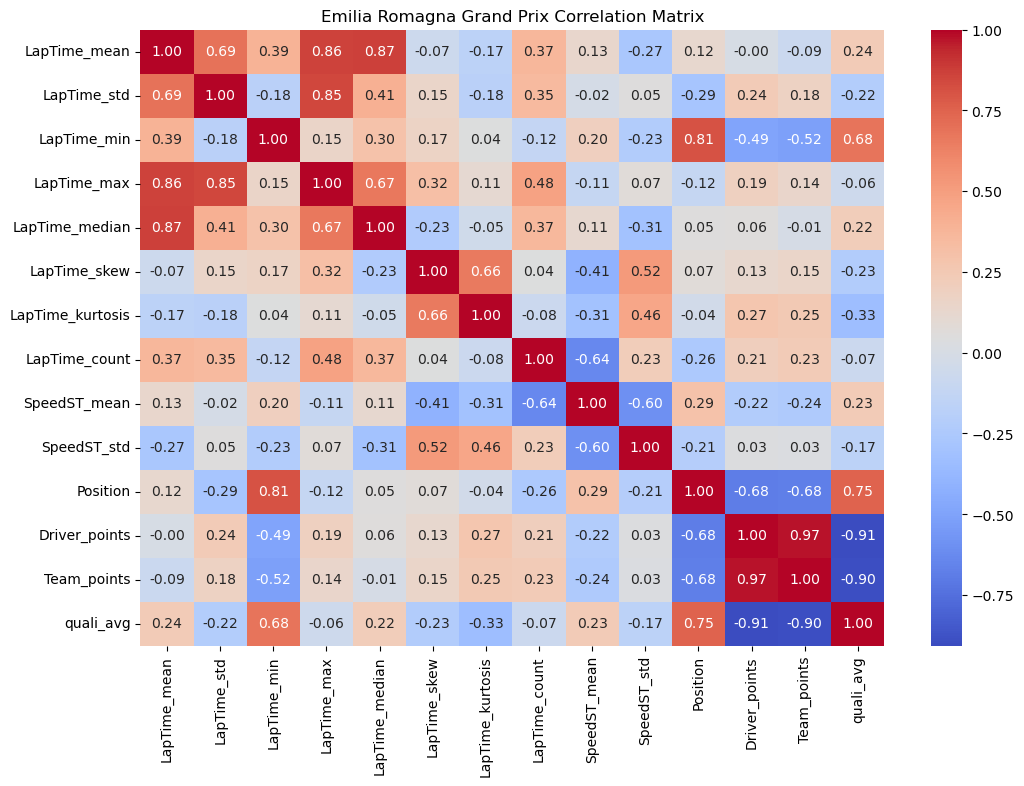

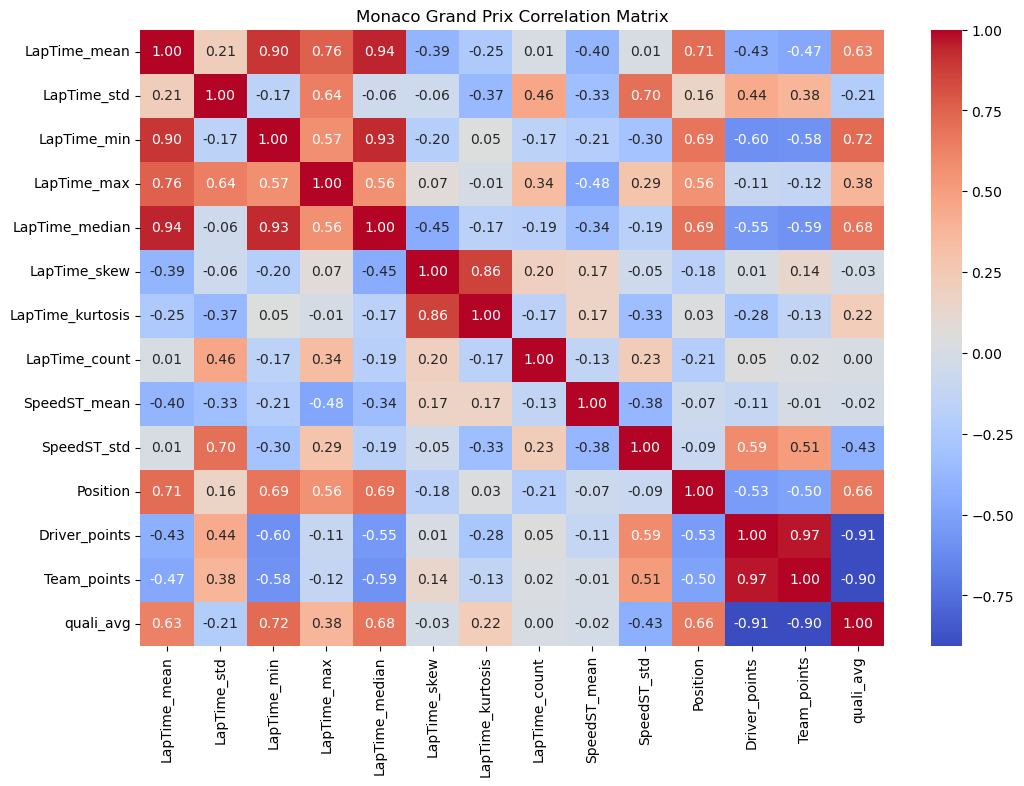

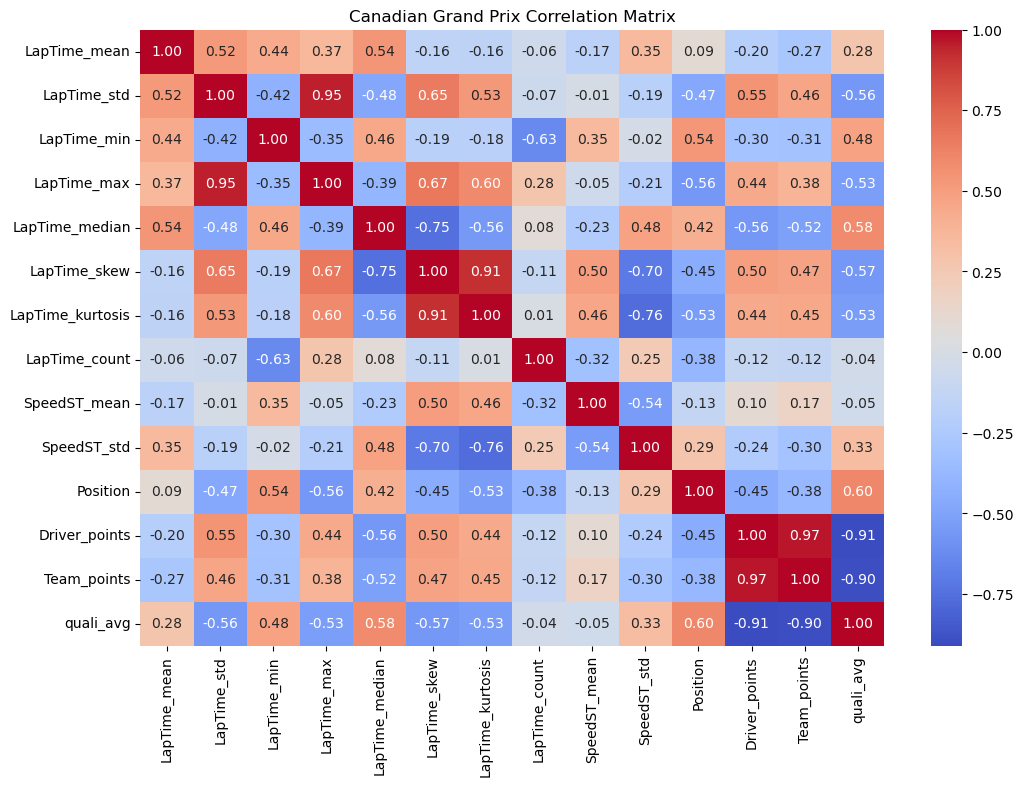

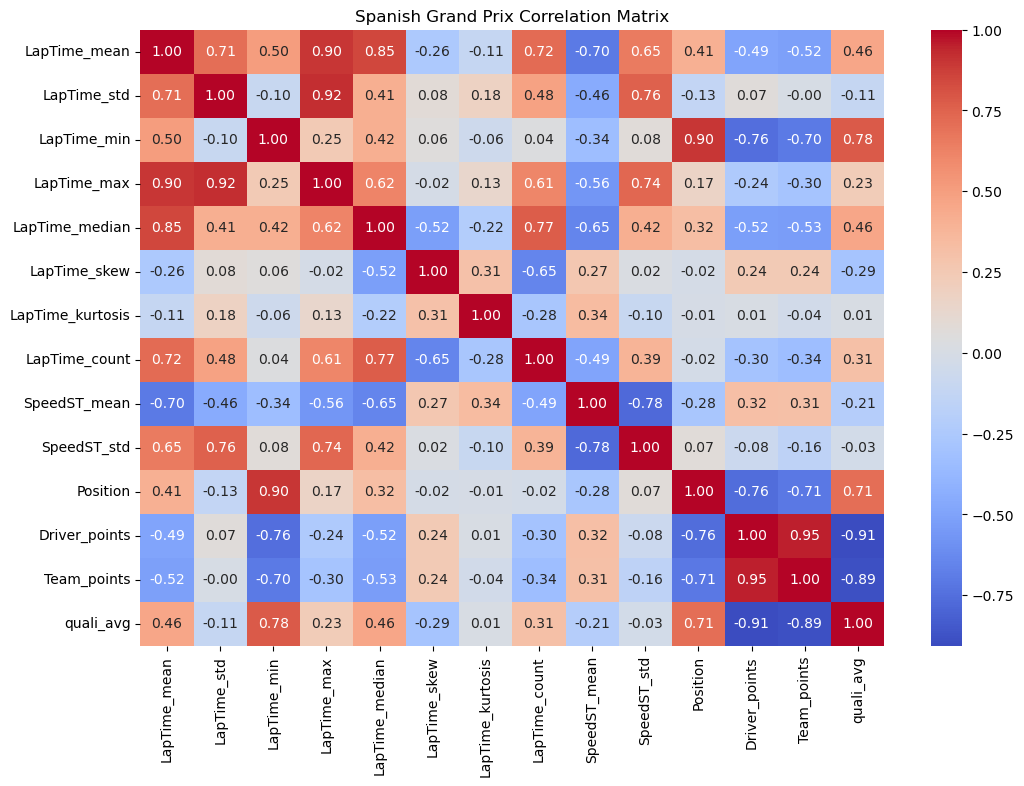

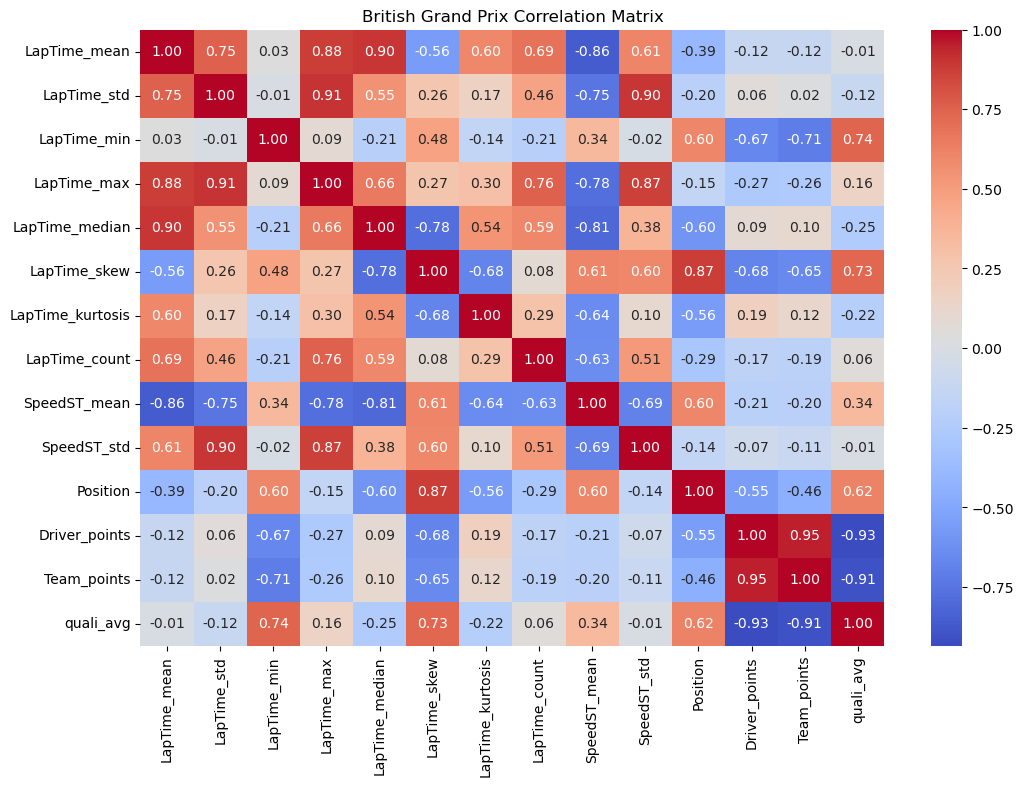

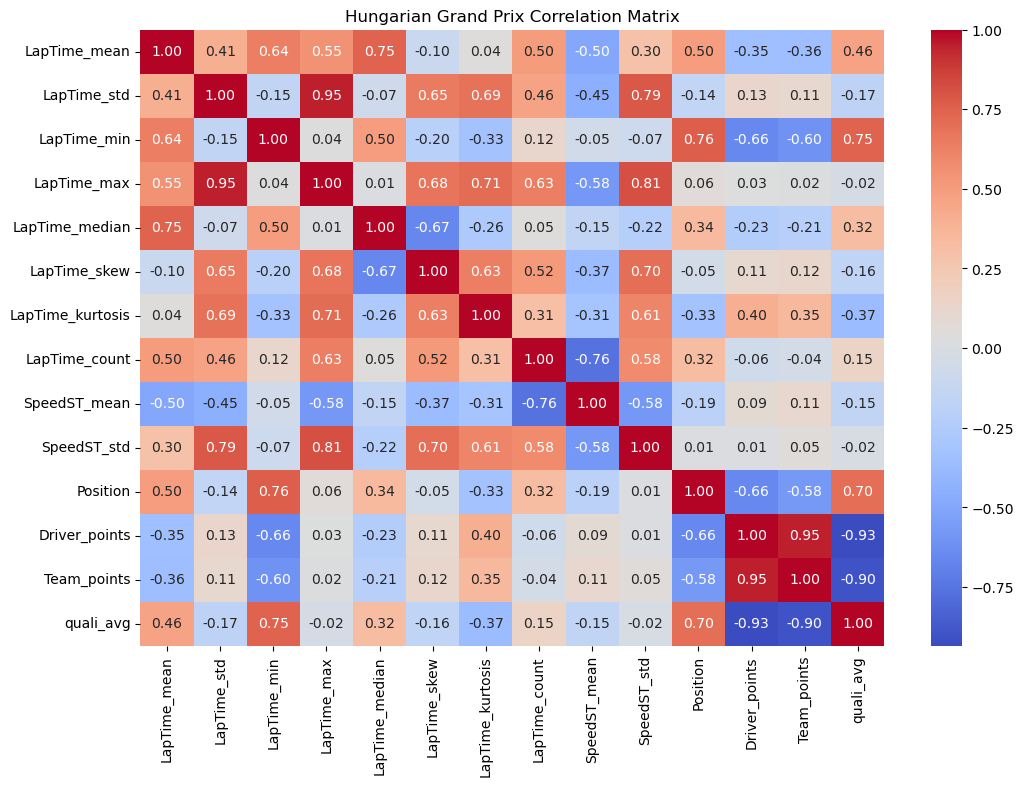

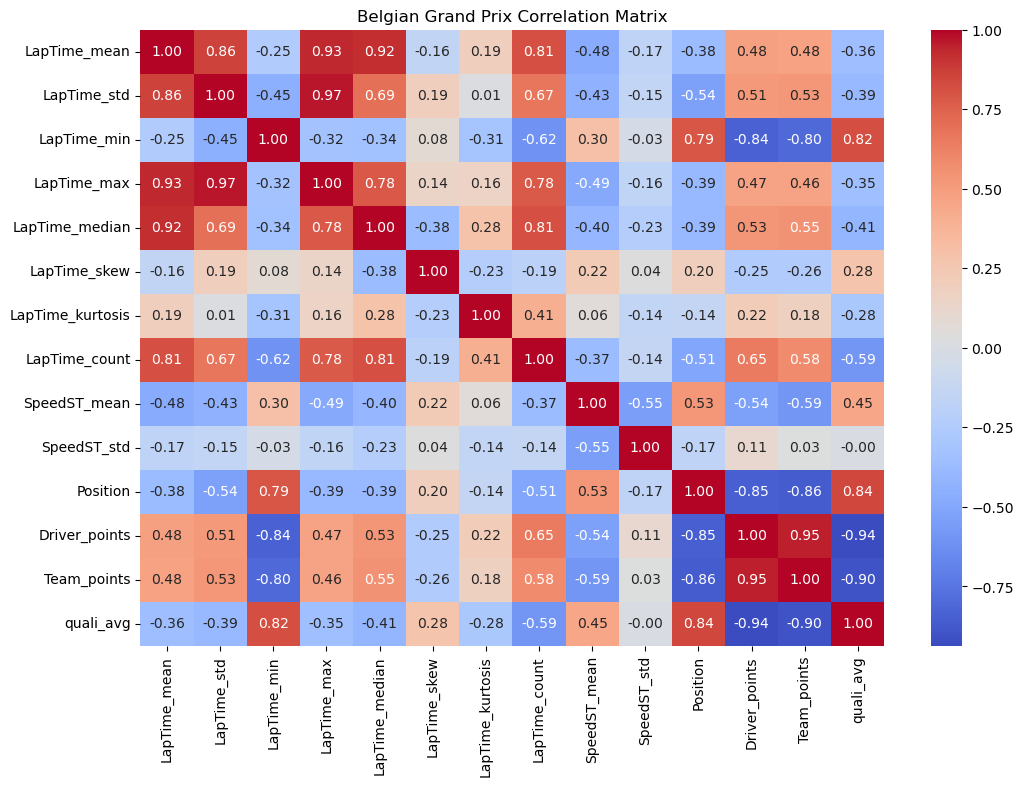

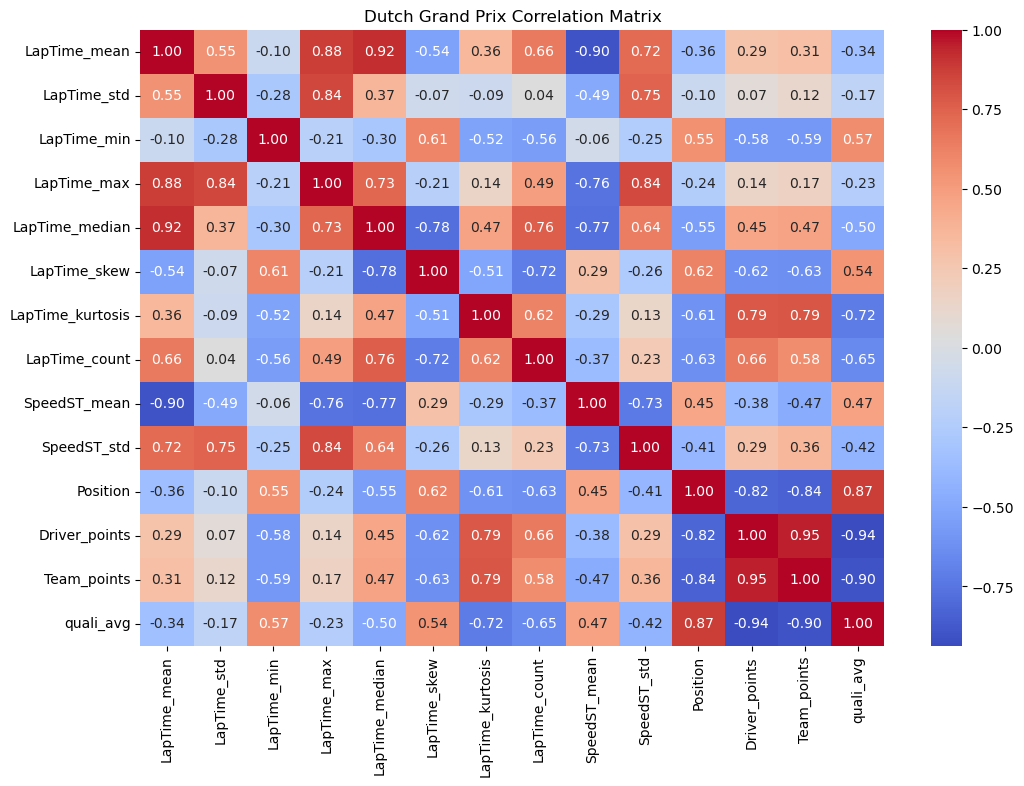

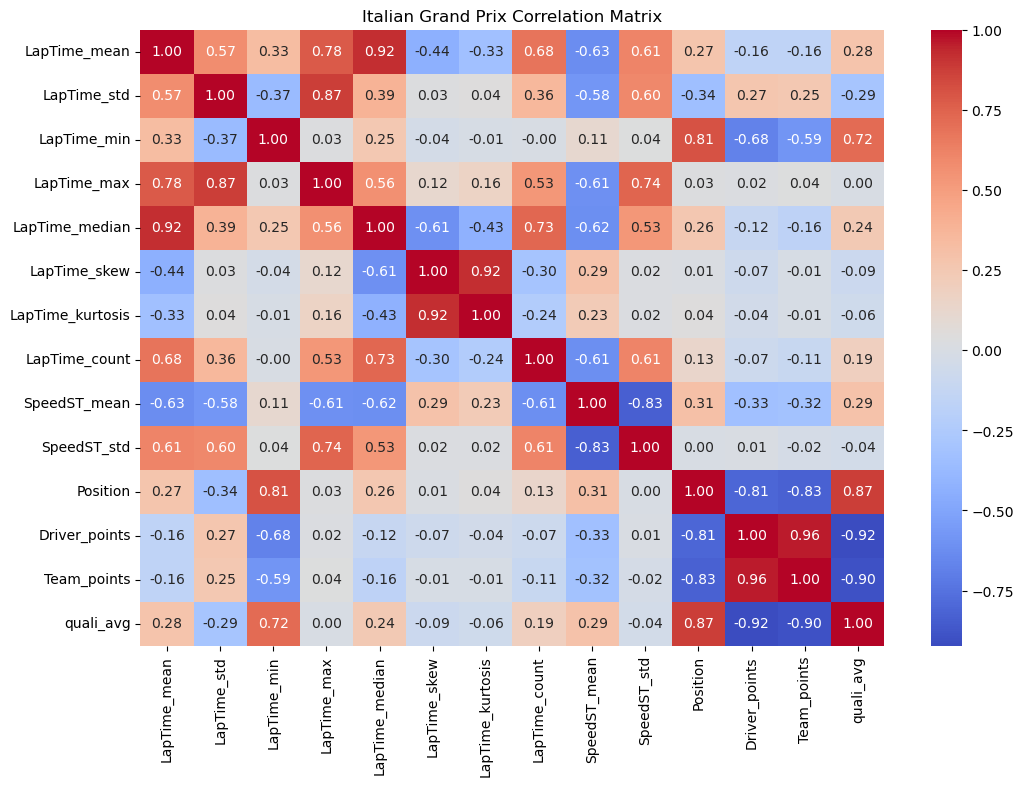

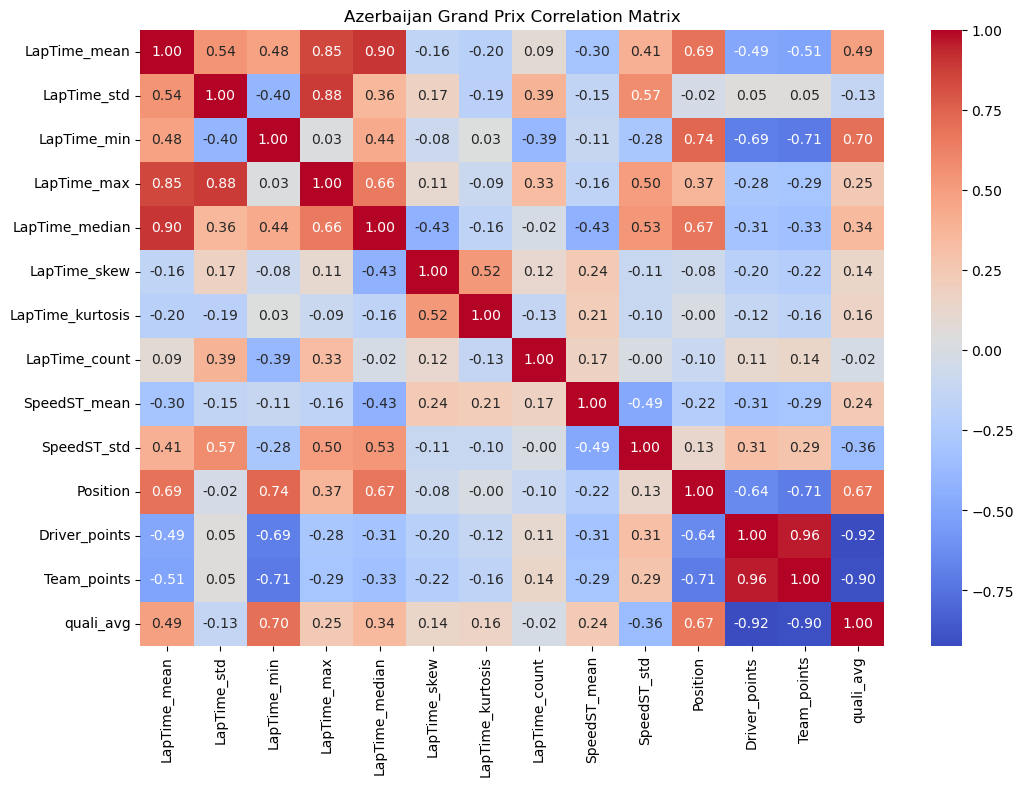

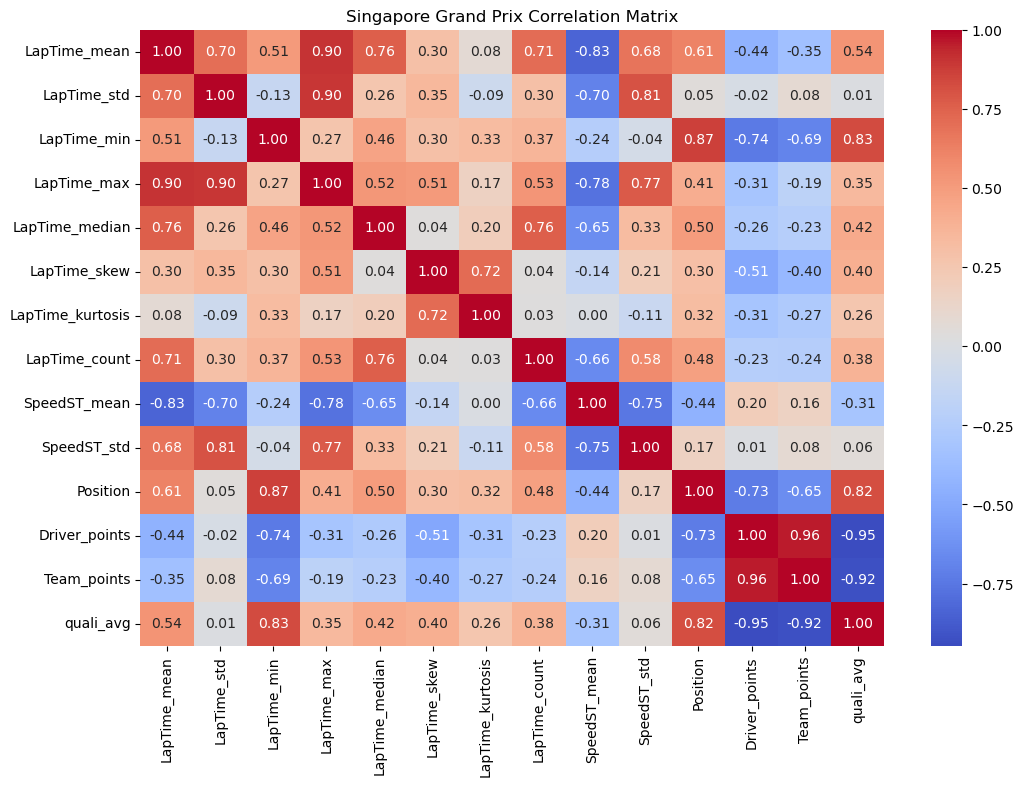

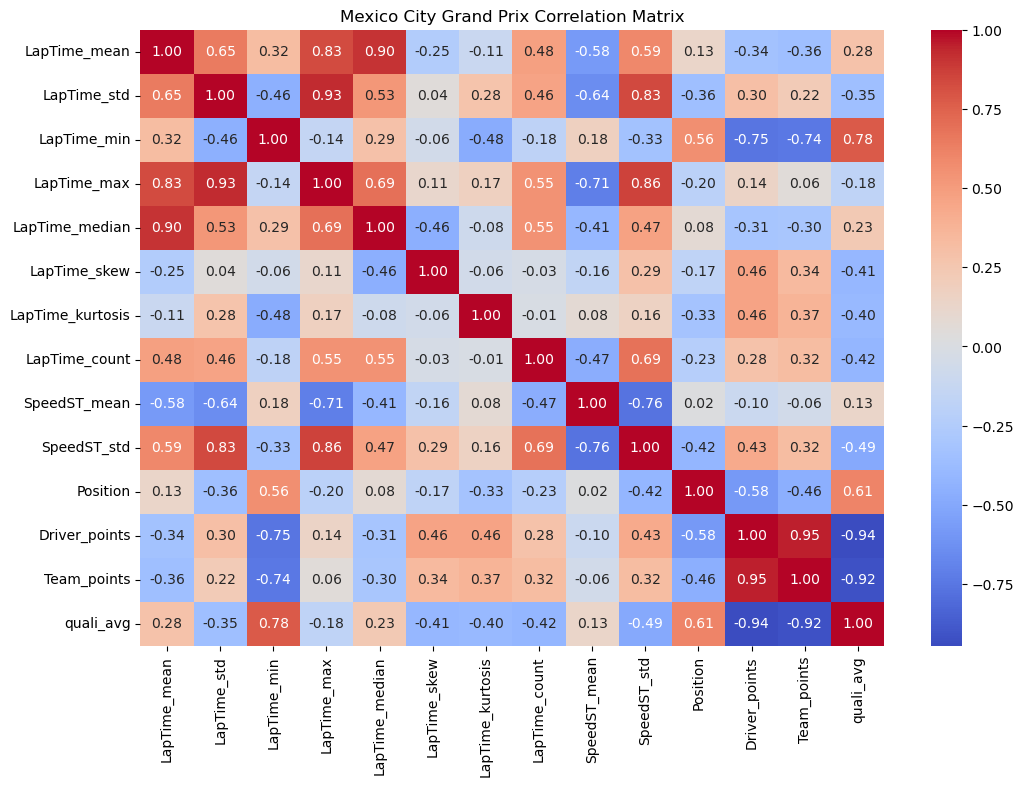

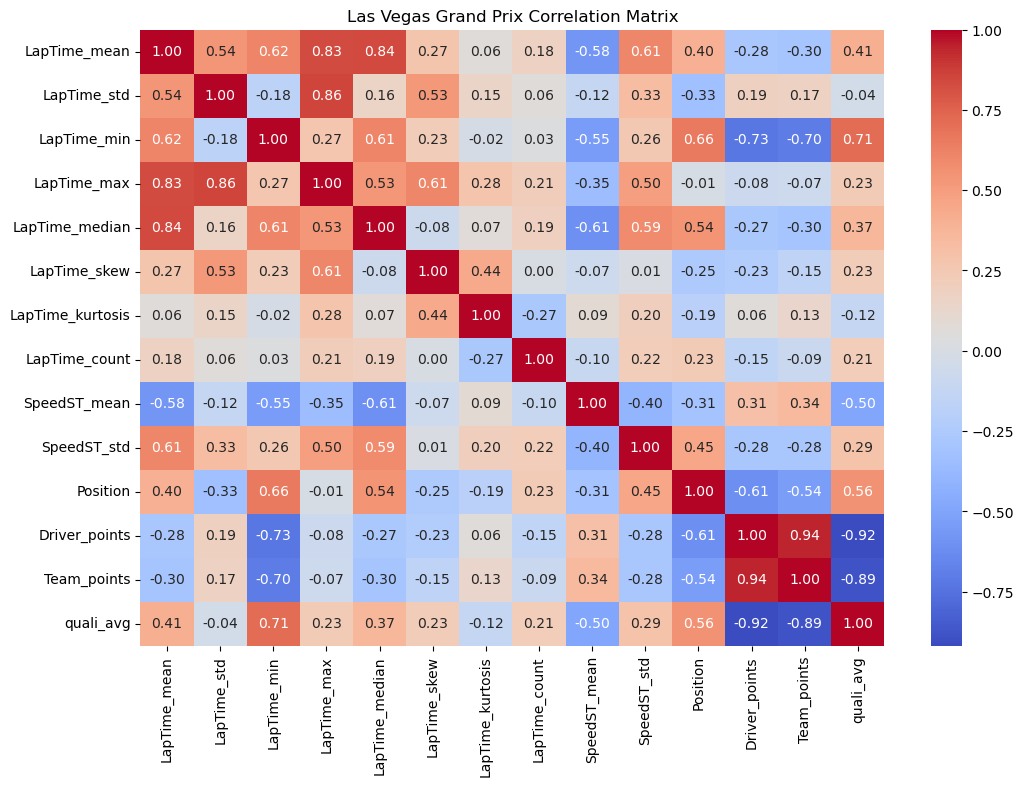

In [7]:
plot_correllations(race_name, race_data)

# LamdbaMART Data Preparation and Evaluation

In [8]:
driver_list = []
group_size_list = []
y_list = []
X_list = []
race_ids = []

# scaler = StandardScaler()
scaler = MinMaxScaler()

race_id = 0 # will correspond to values in race_names
for race in race_data:
    # get driver ordering
    driver = race['Driver'].values
    driver_list.append(driver)
    # get group size
    group_size = len(driver)
    group_size_list.append(group_size)
    # get preference score
    y = race['Position']
    y = y.max() - y + 1 # Reverse the order so that the fastest driver has the highest value
    y_list.append(y)
    # standardize X
    X = race.drop(columns=['Driver', 'Position'])
    X = scaler.fit_transform(X)
    X_list.append(X)
    # add race id
    race_ids.append([race_id]*group_size)
    race_id += 1

def filter_for_race(race_to_predict=None, driver_list=driver_list ,group_size_list=group_size_list ,y_list=y_list ,X_list=X_list ,race_ids=race_ids):

    drivers_combined = np.concatenate(driver_list[:race_to_predict+1])
    group_size_list = np.array(group_size_list[:race_to_predict+1])
    y_combined = np.concatenate(y_list[:race_to_predict+1])
    X_combined = np.concatenate(X_list[:race_to_predict+1])
    race_ids_combined = np.concatenate(race_ids[:race_to_predict+1])


    return drivers_combined, y_combined, X_combined, race_ids_combined, group_size_list



len(driver_list), len(group_size_list), len(y_list), len(X_list), len(race_ids)


(17, 17, 17, 17, 17)

In [41]:
from lightgbm import LGBMRanker


ranking_results = {}
for test_id in range(1, 17):
    # get data only upto a particular round
    drivers_combined, y_combined, X_combined, race_ids_combined, group_size_list = filter_for_race(race_to_predict=test_id)
    # split data
    X_train, y_train, X_test, y_test, drivers_test= split_xy(drivers_combined, y_combined, X_combined, race_ids_combined, test_id)


    model = LGBMRanker(
        objective='lambdarank',
        boosting_type='gbdt', # Gradient Boosting Decision Tree to convert from lambdarank to lambdamart
        n_estimators=1000, 
        importance_type='gain',
        metric='ndcg', # Normalized Discounted Cumulative Gain
        num_leaves=10,
        max_depth=-1,
        learning_rate=0.05, 

        random_state=42,
        verbose=-1
    )
    # fit model
    model.fit(
        X_train, 
        y_train, 
        group=np.delete(group_size_list, test_id)
    )
    # predict rankings
    result = predict_rankings(model, X_test, y_test, drivers_test)

    ranking_results[race_name[test_id]] = result

summary = []
for race, result in ranking_results.items():
    summary.append(evaluate_model(result, race))



summary_df = display_results(summary)
summary_df



Means:
mean_ab_error    3.768750
spearman_corr    0.620771
dtype: float64


mean_ab_error  spearman_corr
Race                                                   
Saudi Arabian Grand Prix        6.500000       0.000000
Australian Grand Prix           4.947368       0.291228
Japanese Grand Prix             3.000000       0.790977
Emilia Romagna Grand Prix       3.100000       0.783459
Monaco Grand Prix               4.000000       0.640602
Canadian Grand Prix             5.300000       0.362406
Spanish Grand Prix              3.000000       0.801504
British Grand Prix              3.900000       0.609023
Hungarian Grand Prix            3.200000       0.705263
Belgian Grand Prix              3.100000       0.766917
Dutch Grand Prix                3.052632       0.814035
Italian Grand Prix              2.400000       0.842105
Azerbaijan Grand Prix           3.900000       0.612030
Singapore Grand Prix            3.200000       0.696241
Mexico City Grand Prix          3.700000       0.581955
Las Vegas Grand Prix            4.000000       0.634586

In [ ]:
sdf = summary_df.copy()
sdf.rename(columns={'mean_ab_error': 'MARE', 'spearman_corr': 'Spearman'}, inplace=True)
sdf.reset_index(inplace=True)
sdf['Cumulative MARE'] = sdf['MARE'].cumsum() / range(1, len(sdf) + 1)
sdf['Cumulative Spearman'] = sdf['Spearman'].cumsum() / range(1, len(sdf) + 1)

sdf=sdf.round(2)

fig = go.Figure(data=[go.Table(
    header=dict(values=list(sdf.columns),
                # fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[sdf[col] for col in sdf.columns],
            #    fill_color='lavender',
               align='left'))
], layout=go.Layout(width=1090, height=850))

fig.show()


In [10]:
import lightgbm as lgb
import matplotlib.pyplot as plt


cols = race_data[0].columns.to_list()
cols.remove('Driver')
cols.remove('Position')


importance_df = pd.DataFrame({
    'Feature': cols,  # Feature names
    'Importance': model.feature_importances_  # Feature importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=True)

fig = px.bar(importance_df, y='Feature', x='Importance', title='Feature Importance (Gain)', orientation='h')
fig.show()

